# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 2 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import division #print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

/home/student/anaconda2/envs/iaml/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: (a) the specification of an automobile in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.

## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [2]:
def loadDataSet(name):
    data_path = os.path.join(os.getcwd(), 'datasets', name + '.csv')
    return pd.read_csv(data_path, delimiter = ',')

In [3]:
# Your code goes here
auto_numeric = loadDataSet('train_auto_numeric')

### ========== Question 1.2 ==========
Display the first 8 instances of the dataset.

In [4]:
# Your code goes here
auto_numeric[:8]

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


### ========== Question 1.3 ==========
Display the summary statistics for the dataset.

In [5]:
# Your code goes here
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


### ========== Question 1.4  ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

In [6]:
def scatter_jitter(x, y, jitter=0.2, title=None, xlabel=None, ylabel=None):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    x = np.asarray(x)
    y = np.asarray(y)
    x = x + jitter*x.std(axis=0)*np.random.standard_normal(x.shape)
    y = y + jitter*y.std(axis=0)*np.random.standard_normal(y.shape)
    plt.scatter(x, y) #marker=4
    
    if title != None:
        plt.title(title)
    
    if xlabel != None:
        plt.xlabel(xlabel)
        
    if ylabel != None:
        plt.ylabel(ylabel)

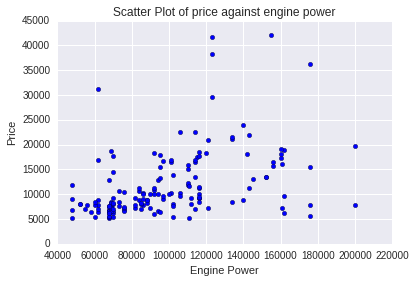

In [7]:
# Your code goes here
#pairgrid = sns.pairplot(auto_numeric,x_vars=["engine-power"], y_vars=['price'], size=5)
#pairgrid.add_legend()
scatter_jitter(auto_numeric['engine-power'], auto_numeric['price'], jitter=0,
               xlabel = "Engine Power", ylabel = "Price",
               title="Scatter Plot of price against engine power")

### ========== Question 1.5  ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

*Your answer goes here*

Yes from the view of it alone there seems to be a correlation between engine power and price. The higher the engine power the higher the price in many cases.

We note however that for the same engine power, for some values of engine power, there are many different prices for the same engine power.

In conclusion it will not be much reliable to use engine power alone to predict the price of the vehicle

### ========== Question 1.6  ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

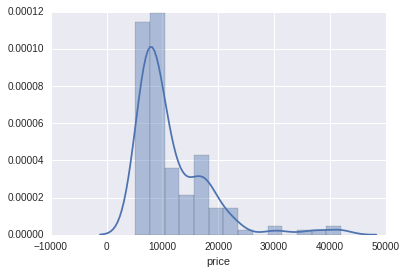

In [8]:
# Your code goes here
sns.distplot(auto_numeric['price']) # we use default automatic bin size

### ========== Question 1.7  ==========
How would you preprocess it to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

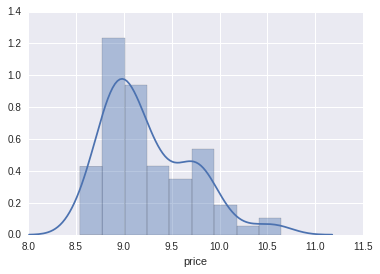

In [9]:
sns.distplot(np.log(auto_numeric['price']))

*Your answer goes here*

The original distribution of the price is highly imbalanced and these cases are more difficult to be handle correctly from a ML algorithm.
As we see a simple log is an easy first step we can make to make the problem of predicting the price more balanced.

### ========== Question 1.8  ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [10]:
# Your code goes here
X = auto_numeric['engine-power']
y = auto_numeric['price']

### ========== Question 1.9 ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [11]:
# Your code goes here
print "previous shape of X"
print X.shape

X = X.values[np.newaxis].T

print "new shape of X"
print X.shape

previous shape of X
(159,)
new shape of X
(159, 1)


### ========== Question 1.10  ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [12]:
# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 0.8, test_size=0.2, random_state=0
)

### ========== Question 1.11  ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [13]:
# Your code goes here
lrModel = LinearRegression(normalize=True)
lrModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### ========== Question 1.12  ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [14]:
# Your code goes here
#print lrModel.predict(X_train)[0]
#print 10463.2523234

#print X_train.shape
constant = np.ones(len(X_train))[np.newaxis].T
#print constant.shape
XandBias = np.hstack((constant, X_train ))
w = np.array([lrModel.intercept_, lrModel.coef_[0]])[np.newaxis].T
#print w.shape
#print XandBias.shape
#print XandBias[:10]
def myPredict(table, biasAndweights):
    return table.dot(biasAndweights)

myPredictions = myPredict(XandBias, w).T[0]

modelPredictions = lrModel.predict(X_train)

print "our equation results in exactly the same results as the predict function of the linear model for all inputs"

np.all(myPredictions == modelPredictions)

our equation results in exactly the same results as the predict function of the linear model for all inputs


True

### ========== Question 1.13  ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

In [15]:
meanEnginePower = np.mean(X_train)
meanEnginePower
oneGuess = lrModel.predict(meanEnginePower)
secondGuess = lrModel.predict(meanEnginePower + 1)
print lrModel.coef_[0]
np.allclose((secondGuess - oneGuess), lrModel.coef_[0])

0.0898838874387


True

*Your answer goes here*

This is a simple model with only one coefficient, it is not a polynomial so we expect it to be a simple line if plotted.

When we increase our input value (the engine power by one unit) then the increase in the price is equal to the coefficient of the input.
This coefficient is quite small and making the intercept playing the biggest role.
However the line is not flat which means that there is some information which relates engine power and price.

Engine power is not as influential on the price as someone might expect

### ========== Question 1.14  ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

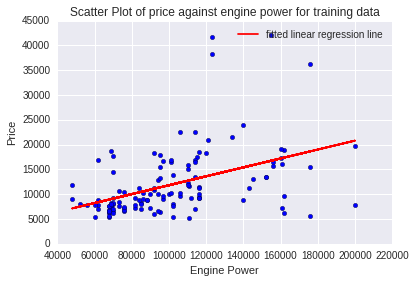

In [16]:
# Your code goes here
scatter_jitter(X_train, y_train, jitter=0,
               xlabel = "Engine Power", ylabel = "Price",
               title="Scatter Plot of price against engine power for training data")

fittedLine = lrModel.intercept_ + X_train * lrModel.coef_

plt.plot(X_train, fittedLine, 'r')

plt.legend(['fitted linear regression line'])

### ========== Question 1.15  ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

*Your answer goes here*

Hold-out validation means that we sacrifice some part of the data (holding them out) for validation and we are doing this randomly.

Well these two actions have both disadvantages.
Firstly if we sacrifice some of our data and the dataset is small enough like the current one then we do not have enough data for training or testing.
Moreover we are in the dilemma of how large (of this overall small dataset) should be the training and how large should be the testing part.

Splitting it randomly also does not guarantee that the training set is not going to be biased. The same thing is valid for the testing set. We might be unlucky enough to get a testing set that is biased towards some value and we might falsely conclude that our algorithm does not work on unseen data just because of this unlycky testing set.

### ========== Question 1.16  ==========
Now we want to use [`KFold`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) cross-validation to evaluate the performance of the regression model. Famliriase yourself with the method and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's `K-fold` class construct a 5-fold cross-validation iterator for the `auto_numeric` dataset. Set the `shuffle` parameter to `True` and `random_state` to `0`. 

In [17]:
# Your code goes here
kFold = KFold(len(auto_numeric), n_folds=5,shuffle=True,random_state=0)
kFold

sklearn.cross_validation.KFold(n=159, n_folds=5, shuffle=True, random_state=0)

### ========== Question 1.17  ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances only in each fold.

In [18]:
# Your code goes here
X_trains = []
X_tests = []

for curTuple in kFold:
    curTrainIndices, curTestingIndices = curTuple
    X_trains.append(curTrainIndices)
    X_tests.append(curTestingIndices)
    
for curTrain in X_trains:
    print np.mean(curTrain)

79.7007874016
77.1496062992
79.2204724409
80.8897637795
78.046875


### ========== Question 1.18  ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [19]:
# Your code goes here
crossPredictions = cross_val_predict(estimator = LinearRegression(normalize=True), X = X, y = y, cv = kFold)
crossPredictions.shape

(159,)

### ========== Question 1.19  ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

http://mathbits.com/MathBits/TISection/Statistics2/correlation.htm

https://piazza.com/class/it4glxodpw62do?cid=75

https://www.youtube.com/watch?v=lng4ZgConCM

In [20]:
import math

In [21]:
# Your code goes here
cc = np.corrcoef(crossPredictions, y)

#manually
def rManually(a,b):
    assert len(a) == len(b)
    curLen = len(a)
    nominator = (curLen * (a * b).sum()) - (a.sum()*b.sum())
    denominator = math.sqrt( (curLen * (a**2).sum()) - (a.sum()**2) ) *\
        math.sqrt( (curLen * (b**2).sum()) - (b.sum()**2) )
    return nominator/denominator

assert round(rManually(y, crossPredictions), 8) == round(cc[0,1], 8)  #verifying that our calculus is correct

def printErrorMetrics(trueTargets, predictions):
    cc = np.corrcoef(predictions, trueTargets)
    
    print "correlation coefficient matrix"
    print cc
    print
    print "coefficient of determination matrix"
    print cc**2
    print 

    se = np.sum((trueTargets - predictions)**2)
    print "squared error"
    print se

    print

    mse = se / len(trueTargets)
    print "mean squared error"
    print mse

    print

    rmse = math.sqrt(mse)
    print "root mean squared error"
    print rmse

    print

    ae = np.abs(trueTargets - predictions).sum()
    print "absolute error"
    print ae

    print

    mae = ae / len(trueTargets)
    print "mean absolute error"
    print mae
    
printErrorMetrics(y, crossPredictions)

correlation coefficient matrix
[[ 1.         0.4171222]
 [ 0.4171222  1.       ]]

coefficient of determination matrix
[[ 1.          0.17399093]
 [ 0.17399093  1.        ]]

squared error
5944457429.02

mean squared error
37386524.7108

root mean squared error
6114.45211862

absolute error
634085.289594

mean absolute error
3987.95779619


### ========== Question 1.20  ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

*Your answer goes here*

The mean absolute error is the absolute difference between the real target values and the predictions. The RMSE is the same thing only that it takes the square of the subtraction. This means that RMSE is more severe for differences that are huge making it even more prone to the outliers. Both of them are averaged by the length of the attributes to make the measurements invariant of the length of the arrays. Finally the we use the RMSE and not the MSE to avoid the unnecessary very high values that MSE produces.

The correlation coefficient measures the strength and the direction of a linear relationship between two variables. And we have four cases, either positive correlation which is close to +1, negative correlation close to -1, no correlation when close to zero and perfect correlation when is equal to plus or minus one. We must also note that a correlation of absolute value greater than 0.8 is generally described as strong correlation and the correlation smaller than 0.5 is generally described as weak correlation.

In our case the coefficient correlation is ~0.42 and which means a weak correlation. Therefore the regression is not as good as we would want. The pros of coefficient correlation is that it ranges from -1 to 1 and we can immediately tell at least roughly if our regression as good enough or not. While using RMSE we cannot directly compare it with anything. The cos of coefficient correlation is that it is scale and offset invariant.

The coefficient determination which is just r^2 it is a measure that allows us to determine how certain one can be im making predictions from a model. So in our case r^2 ~= 0.17. Which means only 17% of the total variation in one variable can be explained by a linear relationship between the real target values and the predictions. The other 100-17 = 83 % remains unexplained which means that the strength of the linear association between target values and predictions is weak.

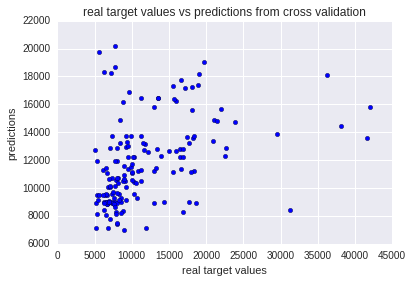

In [22]:
#doing a scatter plot to know what we are talking about when comparing y and predictions
scatter_jitter(y, crossPredictions, jitter = 0, title = 'real target values vs predictions from cross validation',
              xlabel = 'real target values', ylabel='predictions')

### ========== Question 1.21 ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

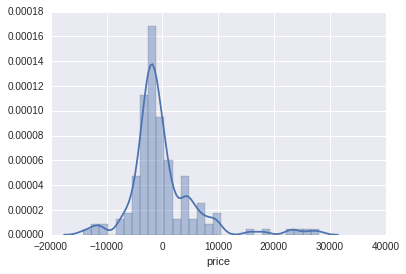

In [23]:
# Your code goes here
sns.distplot(y-crossPredictions)

*Your answer goes here*

Roughly we would expect to have a bell shaped curve as we get from the above distribution.  
However if the model was good enough and the differences was small enough then this curve would revolve around zero. However this graph we see that it peaks at some negative value. This is an indicator to seek a better model.

### ========== Question 1.22 ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [24]:
# Your code goes here
auto_base = loadDataSet('train_auto_base')
auto_base.columns

Index([u'engine-power', u'price'], dtype='object')

In [25]:
X = auto_base['engine-power'].values[np.newaxis].T
y = auto_base['price'].values
assert len(auto_numeric) == len(auto_base)
print X.shape
y.shape

(159, 1)


(159,)

In [26]:
predictions = cross_val_predict(estimator = LinearRegression(normalize=True), X = X, y = y, cv = kFold)

In [27]:
printErrorMetrics(y, predictions)

correlation coefficient matrix
[[ 1.         -0.06191442]
 [-0.06191442  1.        ]]

coefficient of determination matrix
[[ 1.          0.00383339]
 [ 0.00383339  1.        ]]

squared error
7203376643.71

mean squared error
45304255.6208

root mean squared error
6730.84360395

absolute error
779395.892963

mean absolute error
4901.86096203


### ========== Question 1.23 ==========
Show a scatter plot of true vs. predicted prices and another one of engine-power vs. predicted price. Use a single plot with two subplots. Label axes appropriately.

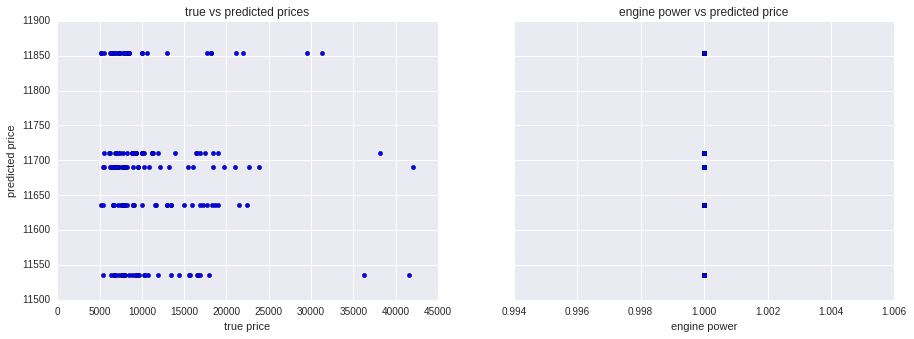

In [28]:
# Your code goes here
#sns.pairplot(x_vars=[])
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (15, 5))
ax1.scatter(y, predictions)
ax1.set_title('true vs predicted prices')
ax1.set_xlabel('true price')
ax1.set_ylabel('predicted price')
ax2.scatter(X.flatten(), predictions)
ax2.set_title('engine power vs predicted price')
ax2.set_xlabel('engine power')

### ========== Question 1.24 ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

*Your answer goes here*

Baseline for the purposes of regression would be considered a model that has no input but only bias, and in simple variate regression this is represented by a straight line that is equal to the expected value / mean value of the output

In [29]:
#baseline for the purposes of regression is
dummyInput = np.ones(len(y))[np.newaxis].T
lr = LinearRegression().fit(dummyInput, y)

In [30]:
print "intercept of dummy linear regression model is equal to expected value of target values"
print lr.intercept_
print np.mean(y)
assert lr.intercept_ == np.mean(y)

print "coefficient of dummy linear regression model is zero"
print lr.coef_

intercept of dummy linear regression model is equal to expected value of target values
11684.7232704
11684.7232704
coefficient of dummy linear regression model is zero
[ 0.]


In [31]:
dummyPredictions = lr.predict(dummyInput)
np.all(dummyPredictions == [lr.intercept_] * len(y))

True

In [32]:
printErrorMetrics(y, dummyPredictions)

correlation coefficient matrix
[[  1.00000000e+00   9.52828841e-17]
 [  9.52828841e-17   1.00000000e+00]]

coefficient of determination matrix
[[  1.00000000e+00   9.07882800e-33]
 [  9.07882800e-33   1.00000000e+00]]

squared error
7188023357.82

mean squared error
45207694.0744

root mean squared error
6723.66671351

absolute error
777723.333333

mean absolute error
4891.34171908


The error metrics above for the dummy model in comparison with the model where the engine power was 1 for all cases shows that the mean absolute error and the root mean squared error are even better for the case of the dummy model.

The coefficient of determination for the dummy model is of power minus 33 which is essentially equal to zero. This is expected to not have any kind of linearity between a static mean value (straight line) and the real price.

In our model above the coefficient of determination is as low as ~0.003 which shows how bad the model is.

### ========== Question 1.25 ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics of the `auto_base` dataset.*)

In [33]:
# Your code goes here
assert sum(auto_base['engine-power']) == len(auto_base)
auto_base.describe()

,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


*Your answer goes here*

all values for engine power are of value one!

intuitively there is no relation between the engine power and the price because no matter which price the automobile has the engine power is always the same therefore it will be impossible to make any kind of sane predictions by using an attribute that remains constant in all entries of our dataset

## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function useful for this question.*

In [34]:
# Your code goes here
target = 'price'
allColumnsExceptTarget = auto_numeric.columns.drop(labels=[target])

/home/student/anaconda2/envs/iaml/lib/python2.7/site-packages/pandas/indexes/base.py:1269: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return promote(getitem(key))


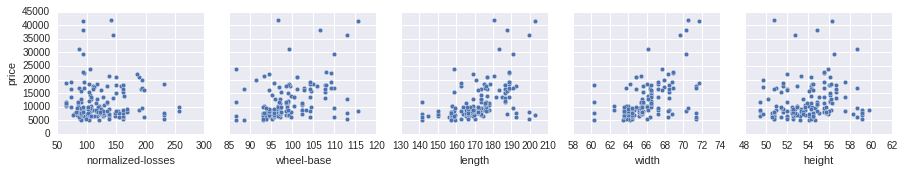

In [35]:
sns.pairplot(auto_numeric, x_vars=allColumnsExceptTarget[:len(allColumnsExceptTarget)/3], y_vars=[target])

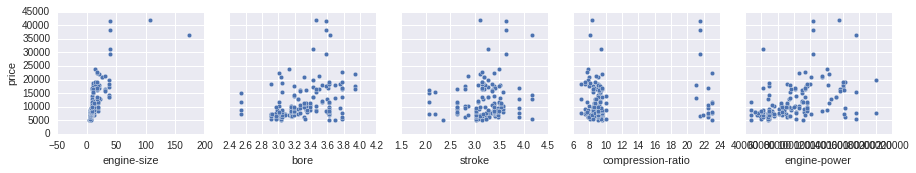

In [36]:
sns.pairplot(auto_numeric,
             x_vars=allColumnsExceptTarget[len(allColumnsExceptTarget)/3:len(allColumnsExceptTarget)*2/3],
             y_vars=[target])

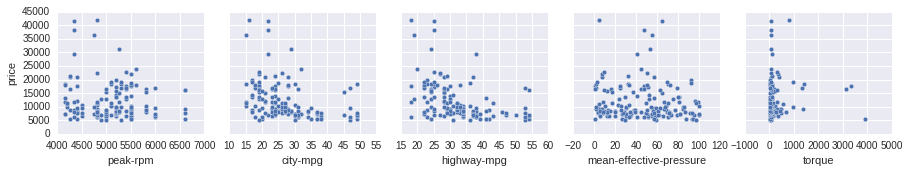

In [37]:
sns.pairplot(auto_numeric,
             x_vars=allColumnsExceptTarget[len(allColumnsExceptTarget)*2/3:len(allColumnsExceptTarget)],
             y_vars=[target])

*Your answer goes here*

At this stage by simply looking at the scatter plots we are searching for linearities either positive or negative. We will not be investigating by eye the case of quadratic fits or other polynomials.

First of all we must say that there is no attribute alone that predicts the price very well that is why we better use a multivariate linear regression model. So no there are no attributes with significant correlation.

Good at predicting the price:
* The **width** of the automobile seems like being a good positive linear case for predicting the price
* The autonomy, the miles per gallon, either the **city-mpg** or the **highway-mpg** seem to be a good linear case where the relation is negative meaning that the higher the mpg the lower the price

Useless at predicting the price:
* **Torque** is useless because from the look of it, automobiles with the same torque have many different prices ranging from the lowest to highest prices. So torque does not help.
* The same is true for **engine size**, we have a wide variety of prices belonging to the same engine size, therefore we can conclude that the engine size is not helpful at predicting the price
* In this same category falls the **compression ratio**

### ========== Question 2.2 ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [38]:
kFold = KFold(len(auto_numeric), n_folds=5,shuffle=True,random_state=0)
kFold

sklearn.cross_validation.KFold(n=159, n_folds=5, shuffle=True, random_state=0)

In [39]:
X = auto_numeric.drop(labels=[target], axis=1)
print X.shape
y = auto_numeric[target]
y.shape

(159, 15)


(159,)

In [40]:
# Your code goes here
predictions = cross_val_predict(estimator = LinearRegression(normalize=True), X = X, y = y, cv = kFold)
predictions.shape

(159,)

### ========== Question 2.3 ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [41]:
# Your code goes here
printErrorMetrics(trueTargets=y,predictions=predictions)

correlation coefficient matrix
[[ 1.          0.74256027]
 [ 0.74256027  1.        ]]

coefficient of determination matrix
[[ 1.          0.55139576]
 [ 0.55139576  1.        ]]

squared error
3693652170.42

mean squared error
23230516.7951

root mean squared error
4819.80464283

absolute error
485004.791341

mean absolute error
3050.34459963


### ========== Question 2.4 ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

*Your answer goes here*

From 6000+ now the **RMSE** is at 4819 which is a significant improvement

From previously ~4000 now the **MEA** is lowered at 3050 which is also an improvement

http://mathbits.com/MathBits/TISection/Statistics2/correlation.htm

The **correlation coefficient** is ~0.74 which is close to the 0.8 threshold where we would treat the correlation as strong which is much better than the previous one.

### ========== Question 2.5 ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

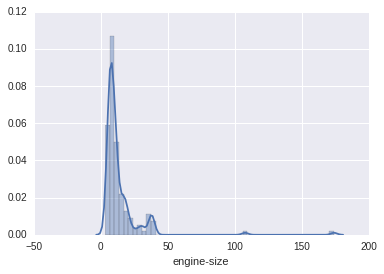

In [42]:
# Your code goes here
sns.distplot(auto_numeric['engine-size'])

### ========== Question 2.6 ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

*Your answer goes here*

Ideally we would want a gaussian distribution for our attribute but this looks like a quasi exponential.  
That's not so bad because the logarithm is its inverse and we can use a log to transform the attribute.  
We might need to shift it a little bit if we have values very near to zero to avoid very negative values.

### ========== Question 2.7 ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

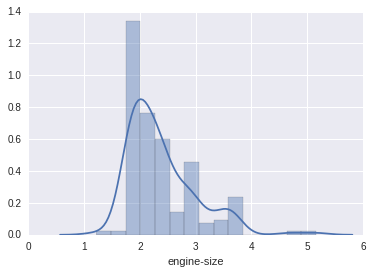

In [43]:
# Your code goes here
engineSizeLog = np.log(auto_numeric['engine-size'])
sns.distplot(engineSizeLog)

we see that this distribution looks much more like a bell shaped curve which is expected to yield better results via tha linear regression machine learning algorithm

### ========== Question 2.8 ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [44]:
kFold = KFold(len(auto_numeric), n_folds=5, shuffle=True, random_state=0)
X = engineSizeLog.values[np.newaxis].T
y = auto_numeric['price']
print X.shape
y.shape

(159, 1)


(159,)

In [45]:
# Your code goes here
predictions = cross_val_predict(estimator = LinearRegression(normalize=True), X = X, y = y, cv = kFold)

In [46]:
printErrorMetrics(trueTargets=y, predictions=predictions)

correlation coefficient matrix
[[ 1.          0.82209462]
 [ 0.82209462  1.        ]]

coefficient of determination matrix
[[ 1.          0.67583956]
 [ 0.67583956  1.        ]]

squared error
2330615089.7

mean squared error
14657956.539

root mean squared error
3828.57108319

absolute error
395456.936466

mean absolute error
2487.15054381


In [47]:
## Now metrics for the multivariate

In [48]:
target = 'price'
kFold = KFold(len(auto_numeric), n_folds=5, shuffle=True, random_state=0)

y = auto_numeric[target]
#print X.shape
print y.shape

autoNumericWithoutPrice = auto_numeric.drop(labels=[target], axis=1).copy()
autoNumericWithoutPrice['engine-power'] = np.log(autoNumericWithoutPrice['engine-power'])

X = autoNumericWithoutPrice.values
X.shape
#np.hstack((auto_numeric['engine-power'].values[np.newaxis].T, autoNumericWithoutPrice['engine-power'].values[np.newaxis].T))

(159,)


(159, 15)

In [49]:
predictions = cross_val_predict(estimator = LinearRegression(normalize=True), X = X, y = y, cv = kFold)

In [50]:
printErrorMetrics(trueTargets=y, predictions=predictions)

correlation coefficient matrix
[[ 1.          0.74364907]
 [ 0.74364907  1.        ]]

coefficient of determination matrix
[[ 1.          0.55301394]
 [ 0.55301394  1.        ]]

squared error
3674368639.74

mean squared error
23109236.7279

root mean squared error
4807.20674903

absolute error
484133.696167

mean absolute error
3044.86601363


### ========== Question 2.9 ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

*Your answer goes here*

#### Simple regression case
First we are comparing the simple linear regression cases when the engine size was a simple attribute and when it was transformed using the log attribute.

correlation coefficient is much better
* engine power: 0.4171222
* log engine power: 0.82209462  

coefficient of determination is much better
* engine power: 0.17399093
* log engine power: 0.67583956

Root Mean Square Error is much better
* engine power: 6114.45211862
* log engine power: 3828.57108319

Mean Absolute Error is much better
* engine power: 3987.95779619
* log engine power: 2487.15054381

The performance is improved for all metrics

#### Multivariate regression case

correlation coefficient is almost the same
* engine power: 0.74256027
* log engine power: 0.74364907  

coefficient of determination is almost the same
* engine power: 0.55139576
* log engine power: 0.55301394

Root Mean Square Error is almost the same
* engine power: 4819.80464283
* log engine power: 4807.20674903

Mean Absolute Error is almost the same
* engine power: 3050.34459963
* log engine power: 3044.86601363

The conclusion is that when comparing the multivariate cases for all attributes when engine power was transformed or non-transformed we see that the impact was insignificant. Only a small increase in performance which is visible in all metrics.

On the other hand if we compare the multivariate case vs the simple regression when engine power was transformed with log the single attribute managed to outperform the multivariate model! Meaning that we have overall a better and faster model if we use the attribute log(engine power)

### ========== Question 2.10 ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [51]:
pd.set_option('max_columns', 30)

In [52]:
# Your code goes here
auto_full = loadDataSet('train_auto_full')

In [53]:
print "length of dataset samples"
print len(auto_full)
print
print "count of attributes"
print len(auto_full.columns)
print
auto_full[:20]

length of dataset samples
159

count of attributes
27



,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


### ========== Question 2.11 ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

In [54]:
types = auto_full.dtypes
#print types
print "these are all the columns which are not float or integer but categorical"
types[types=='object']

these are all the columns which are not float or integer but categorical


make               object
fuel-type          object
aspiration         object
body-style         object
drive-wheels       object
engine-location    object
engine-type        object
fuel-system        object
dtype: object

In [55]:
categAttrs = types[types=='object'].keys()
categAttrs

Index([u'make', u'fuel-type', u'aspiration', u'body-style', u'drive-wheels',
       u'engine-location', u'engine-type', u'fuel-system'],
      dtype='object')

In [56]:
booleanMask = types=='object'
booleanMask

normalized-losses          False
make                        True
fuel-type                   True
aspiration                  True
num-of-doors               False
body-style                  True
drive-wheels                True
engine-location             True
wheel-base                 False
length                     False
width                      False
height                     False
engine-type                 True
num-of-cylinders           False
engine-size                False
fuel-system                 True
bore                       False
stroke                     False
compression-ratio          False
engine-power               False
peak-rpm                   False
city-mpg                   False
highway-mpg                False
symboling                  False
mean-effective-pressure    False
torque                     False
price                      False
dtype: bool

*Your answer goes here*

The answer is because linear regression works is based on mathematics and we cannot use categories as inputs in mathematical formulas of any kind. We need to represent the categories as numbers

### ========== Question 2.12 ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiriase yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [57]:
auto_full_edit = auto_full.copy()

http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [58]:
# Your code goes here
def labelEncodeColumn(name):
    le = LabelEncoder()
    le.fit(auto_full[name]) #note that duplicates does not seem to matter here, so no need to call unique beforehand
    #print auto_full_edit['make']
    return le.transform(auto_full_edit[name])
    #print auto_full_edit['make']

In [59]:
#le.transform
for categAttr in categAttrs:
    auto_full_edit[categAttr] = labelEncodeColumn(categAttr)

In [60]:
print "display the first row to get a sense on what we have done. The categorical attributes must be gone and replaced by numbers"
auto_full_edit[:1]

display the first row to get a sense on what we have done. The categorical attributes must be gone and replaced by numbers


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,0,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2,4,8.85,4,3.19,3.4,10.0,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0


In [61]:
#test = auto_full_edit['make'].copy()
#print test.unique()
#len(test.unique())

# test = np.array([3, 4, 2, 2, 4]).reshape(-1, 1)
# print test.shape

# encoder = OneHotEncoder()

# encoder.fit(test)

# out = encoder.transform(test).toarray()

# print encoder.n_values_
# print encoder.feature_indices_
# print encoder.active_features_

# out

In [62]:
# test = auto_full_edit[['make','num-of-doors']].copy()
# print test.shape

# encoder = OneHotEncoder(categorical_features=[True,False])

# encoder.fit(test)

# print encoder.n_values_
# print encoder.feature_indices_
# print encoder.active_features_

# out = encoder.transform(test).toarray()
# out.shape

http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [63]:
print "shape of auto_full_edit before one hot encoding"
print auto_full_edit.shape

encoder = OneHotEncoder(categorical_features=booleanMask)

transformation = encoder.fit_transform(auto_full_edit)

#Note that columns here are considered the columns where the booleanMask above is true
print encoder.n_values_  # this is how many different categories you have for the current column
print encoder.feature_indices_ # feature indices meaning that from 0 to 17 is the first one hot encoding because
#it has 18 features/categories, from the index 18 to index 19 we are going to have the next one-hot-encoding
#since it has 2 features/categories
print encoder.active_features_ #here we have the full list of the indices that are occupied by the OneHotEncoding
#You will notice that from 0 to 41 all indices are used for the one hot encoding and all the rest of numerical data
#are stacked at the right

autoFullPreprocessed = transformation.toarray()
autoFullPreprocessed.shape

shape of auto_full_edit before one hot encoding
(159, 27)
[18  2  2  5  3  1  5  6]
[ 0 18 20 22 27 30 31 36 42]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


(159, 61)

In [64]:
#let's verify the size of the columns
numericalCount = len(auto_full.columns) - len(categAttrs)
print "count of numerical columns only"
print numericalCount
print
totalColumns = 0
for categAttr in categAttrs:    
    columnsNeeded = len(np.unique(auto_full[categAttr]))
    totalColumns += columnsNeeded
    
print "total columns needed for all one hot encodings"
print totalColumns
print

print "total expected columns of dataset after one hot encoding"
colCountAfterOneHotEnc = numericalCount + totalColumns
print colCountAfterOneHotEnc

assert colCountAfterOneHotEnc == autoFullPreprocessed.shape[1]

count of numerical columns only
19

total columns needed for all one hot encodings
42

total expected columns of dataset after one hot encoding
61


### Dummy variable trap

Because of the dummy variable trap we need to drop one of the columns for each category

http://www.algosome.com/articles/dummy-variable-trap-regression.html

In [65]:
firstIndexOfEachCategory = encoder.feature_indices_[:len(encoder.feature_indices_) - 1]

print "each of these is the first column of each category"
print firstIndexOfEachCategory
print
lenCategories = len(firstIndexOfEachCategory)
print "we have " + str(lenCategories) + " categories"

each of these is the first column of each category
[ 0 18 20 22 27 30 31 36]

we have 8 categories


In [86]:
autoFullPreprocessed = np.delete(autoFullPreprocessed, firstIndexOfEachCategory, axis=1)

### ========== Question 2.13 ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [87]:
# Your code goes here
datasetLen = len(autoFullPreprocessed)

kFold = KFold(datasetLen, n_folds=5, shuffle=True, random_state=0)

y = autoFullPreprocessed[:,autoFullPreprocessed.shape[1]-1].copy()
print y.shape

X = autoFullPreprocessed[:,0:autoFullPreprocessed.shape[1]-1].copy()
#autoFullWithoutPrice['engine-power'] = np.log(autoFullWithoutPrice['engine-power'])
X.shape

(159,)


(159, 52)

In [88]:
assert np.all(auto_full_edit['price'] == y) # just a check that we picked price as the correct column

In [89]:
predictions = cross_val_predict(estimator = LinearRegression(normalize=False), X = X, y = y, cv = kFold)
printErrorMetrics(trueTargets=y, predictions=predictions)

correlation coefficient matrix
[[ 1.          0.92695037]
 [ 0.92695037  1.        ]]

coefficient of determination matrix
[[ 1.          0.85923698]
 [ 0.85923698  1.        ]]

squared error
1072195241.97

mean squared error
6743366.30168

root mean squared error
2596.7992417

absolute error
283679.385899

mean absolute error
1784.14708112


### ========== Question 2.14 ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

*Your answer goes here*

At first the performance seemed very very low which is not something you would expect given that more data are provided, we should be able to do at least the same or better performance in general.

But then we found out about the dummy variable trap in regression models:
http://www.algosome.com/articles/dummy-variable-trap-regression.html

So comparing the performance of **multi-variate** cases the increase is apparent on all metrics

correlation coefficient is much better
* with categories: 0.92695037
* without categories: 0.74364907

coefficient of determination is much better
* with categories: 0.85923698
* without categories: 0.55301394

Root Mean Square Error is much better
* with categories: 2596.7992417
* without categories: 4807.20674903

Mean Absolute Error is much better
* with categories: 1784.14708112
* without categories: 3044.86601363

In [90]:
#DOING SOME DUMMY TESTS, YOU CAN NEGLECT THESE CELL UNTIL NEXT QUESTION
#model = 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 0.8, test_size=0.2, random_state=0
)

model = LinearRegression(normalize=True)

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [91]:
predictions = model.predict(X_test)

printErrorMetrics(trueTargets=y_test, predictions=predictions)

correlation coefficient matrix
[[ 1.          0.91782393]
 [ 0.91782393  1.        ]]

coefficient of determination matrix
[[ 1.          0.84240077]
 [ 0.84240077  1.        ]]

squared error
432145407.503

mean squared error
13504543.9845

root mean squared error
3674.85292011

absolute error
73736.9848548

mean absolute error
2304.28077671


In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 0.8, test_size=0.2, random_state=0
)

model = LinearRegression(normalize=False).fit(X_train, y_train)

printErrorMetrics(trueTargets=y_test, predictions = model.predict(X_test))

correlation coefficient matrix
[[ 1.          0.91782393]
 [ 0.91782393  1.        ]]

coefficient of determination matrix
[[ 1.          0.84240077]
 [ 0.84240077  1.        ]]

squared error
432145407.5

mean squared error
13504543.9844

root mean squared error
3674.8529201

absolute error
73736.9848546

mean absolute error
2304.2807767


### ========== Question 2.15 ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. You should still make use of the transformations applied in 2.8. Has your performance improved? Explain your answer in 1-2 sentences.

#### NOTE THAT WE ARE COMPARING AGAINST THE AUTO NUMERIC DATASET (not the full) because the question refers to 2.8. It's a little ambigious therefore we had to do

In [73]:
# Your code goes here
target='price'
kFold = KFold(len(auto_numeric), n_folds=5, shuffle=True, random_state=0)

y = auto_numeric[target]

autoNumericWithoutPrice = auto_numeric.drop(labels=[target], axis=1).copy()
autoNumericWithoutPrice['engine-power'] = np.log(autoNumericWithoutPrice['engine-power'])

X = autoNumericWithoutPrice.values

dtr = DecisionTreeRegressor(random_state=0)
preds = cross_val_predict(estimator = dtr, X = X, y=y, cv=kFold)

printErrorMetrics(trueTargets=y, predictions=preds)

correlation coefficient matrix
[[ 1.          0.84477684]
 [ 0.84477684  1.        ]]

coefficient of determination matrix
[[ 1.          0.71364791]
 [ 0.71364791  1.        ]]

squared error
2259944186.0

mean squared error
14213485.4465

root mean squared error
3770.07764463

absolute error
412478.0

mean absolute error
2594.20125786


In [74]:
# Your code goes here
target='price'
kFold = KFold(len(auto_numeric), n_folds=5, shuffle=True, random_state=0)

y = auto_numeric[target]

autoNumericWithoutPrice = auto_numeric.drop(labels=[target], axis=1).copy()
autoNumericWithoutPrice['engine-power'] = np.log(autoNumericWithoutPrice['engine-power'])

X = autoNumericWithoutPrice.values

dtr = RandomForestRegressor(random_state=0)
preds = cross_val_predict(estimator = dtr, X = X, y=y, cv=kFold)

printErrorMetrics(trueTargets=y, predictions=preds)

correlation coefficient matrix
[[ 1.          0.90507111]
 [ 0.90507111  1.        ]]

coefficient of determination matrix
[[ 1.          0.81915371]
 [ 0.81915371  1.        ]]

squared error
1305684784.28

mean squared error
8211853.98918

root mean squared error
2865.63326146

absolute error
316639.4

mean absolute error
1991.4427673


*Your answer goes here*

Comparing all the error metrics it seems that Decision Tree Regressor managed to perform better than any of the Linear Regression model we used in this assignment.
This is probably because there is the need for more pre-processing and careful selection of features or transformation of those to derive a linear relationship between our attributes and the target (price).

Random Forest Regressor performed even better